In [1]:
import numpy as np
import time
import csv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from drugsLib.drug import statesFromBits, Drug, hamDist

In [2]:
AMPf = np.array([1.851, 2.082, 1.948, 2.434, 2.024, 2.198, 2.033, 0.034, 1.57, 2.165, 0.051, 0.083, 2.186, 2.322, 0.088, 2.821])
AMf  = np.array([1.778, 1.782, 2.042, 1.752, 1.448, 1.544, 1.184, 0.063, 1.72, 2.008, 1.799, 2.005, 1.557, 2.247, 1.768, 2.047])
CECf = np.array([2.258, 1.996, 2.151, 2.648, 2.396, 1.846, 2.23, 0.214, 0.234, 0.172, 2.242, 0.093, 2.15, 0.095, 2.64, 0.516])
CTXf = np.array([0.16, 0.085, 1.936, 2.348, 1.653, 0.138, 2.295, 2.269, 0.185, 0.14, 1.969, 0.203, 0.225, 0.092, 0.119, 2.412])
ZOXf = np.array([0.993, 0.805, 2.069, 2.683, 1.698, 2.01, 2.138, 2.688, 1.106, 1.171, 1.894, 0.681, 1.116, 1.105, 1.103, 2.591])
CXMf = np.array([1.748, 1.7, 2.07, 1.938, 2.94, 2.173, 2.918, 3.272, 0.423, 1.578, 1.911, 2.754, 2.024, 1.678, 1.591, 2.923])
CROf = np.array([1.092, 0.287, 2.554, 3.042, 2.88, 0.656, 2.732, 0.436, 0.83, 0.54, 3.173, 1.153, 1.407, 0.751, 2.74, 3.227])
AMCf = np.array([1.435, 1.573, 1.061, 1.457, 1.672, 1.625, 0.073, 0.068, 1.417, 1.351, 1.538, 1.59, 1.377, 1.914, 1.307, 1.728])
CAZf = np.array([2.134, 2.656, 2.618, 2.688, 2.042, 2.756, 2.924, 0.251, 0.288, 0.576, 1.604, 1.378, 2.63, 2.677, 2.893, 2.563])
CTTf = np.array([2.125, 1.922, 2.804, 0.588, 3.291, 2.888, 3.082, 3.508, 3.238, 2.966, 2.883, 0.89, 0.546, 3.181, 3.193, 2.543])
SAMf = np.array([1.879, 2.533, 0.133, 0.094, 2.456, 2.437, 0.083, 0.094, 2.198, 2.57, 2.308, 2.886, 2.504, 3.002, 2.528, 3.453])
CPRf = np.array([1.743, 1.662, 1.763, 1.785, 2.018, 2.05, 2.042, 0.218, 1.553, 0.256, 0.165, 0.221, 0.223, 0.239, 1.811, 0.288])
CPDf = np.array([0.595, 0.245, 2.604, 3.043, 1.761, 1.471, 2.91, 3.096, 0.432, 0.388, 2.651, 1.103, 0.638, 0.986, 0.963, 3.268])
TZPf = np.array([2.679, 2.906, 2.427, 0.141, 3.038, 3.309, 2.528, 0.143, 2.709, 2.5, 0.172, 0.093, 2.453, 2.739, 0.609, 0.171])
FEPf = np.array([2.59, 2.572, 2.393, 2.832, 2.44, 2.808, 2.652, 0.611, 2.067, 2.446, 2.957, 2.633, 2.735, 2.863, 2.796, 3.203])

In [3]:
states = statesFromBits(16, 4)

# Zero State of equal probabilities
S0 = np.array(np.ones(len(states))/2**4)
print(S0)
print(states)

[0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]
['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']


In [4]:
# Initialize all Drug Classes
# Parameters are (Name, fitness array, states assigned to those fitness values
#                 genotype associated with lowest fitness peak, and R defaults to 0)
AMP = Drug('Ampicillin', AMPf, states, '0110')
AM = Drug('Amoxicillin', AMf, states, '0010')
CEC = Drug('Cefaclor', CECf, states, '0100')
CTX = Drug('Cefotaxime', CTXf, states, '1010')
ZOX = Drug('Ceftizoxime', ZOXf, states, '1001')
CXM = Drug('Cefuroxime', CXMf, states, '0100')
CRO = Drug('Ceftriaxone', CROf, states, '0100')
AMC = Drug('Amoxicillin+Clav', AMCf, states, '0100')
CAZ = Drug('Ceftazidime', CAZf, states, '0011')
CTT = Drug('Cefotetan', CTTf, states, '1101')
SAM = Drug('Ampicillin+Sulbactam', SAMf, states, '1111')
CPR = Drug('Cefprozil', CPRf, states, '0011')
CPD = Drug('Cefpodoxime', CPDf, states, '1010')
TZP = Drug('Piperacillin+Tazobactam', TZPf, states, '1000')
FEP = Drug('Cefepime', FEPf, states, '0000')

# list of all drug Classes
allDrugs = [AMP, AM, CEC, CTX, ZOX , CXM, CRO, AMC, CAZ, CTT, SAM, CPR, CPD, TZP, FEP]

col_names=['Final Drug', 'Steering Drug 1', 'Steering Drug 1 Amount', 'Steering Drug 2', 'Steering Drug 2 Amount',
           'Drug1:Drug2', 'Drug1+Drug2', 'Fitness of infinite apps', 'Lowest Fitness Achieved',
           'Maximum Simulated Drug Application', 'R-Value', 'epsilon', 'rho', 'theta']

# Exploring the Importance of Third Drug Application

Applying the third drug --- the steered drug --- provides the landscape after single or infinite applications. We can also look at the landscape just before applying the third drug.

We test up to 10 applications with tolerance $\epsilon$ defined as follows.

$$f_{\mathrm{simulate}}(\mathrm{NA, NB, NC})=\epsilon f_{\mathrm{inf}}(\infty, \infty, \mathrm{NC}) $$

NA, NB, and NC are the number of times a drug is applied.
NA and NB are ranges of 0 to 10 (applications) and NC is either 0, 1, or infinity.

## Without Applying the third drug

In [5]:
# Just timing to get an estimate of how long the program runs
start = time.time()

# This is the max number of applications simulates
# ...this will produce a 10x10 matrix
app = 10

# This is the value that dicatates the tolerance of reaching the
# lowest fitness peak
epsilon = 0.05

# Saves everything as a csv
filename = 'R0-10_AllDrugs_OnlyCountedWithin95perc_app10_eps_NoThirdInf.csv'
f = open(filename, 'w')
drugWriter = csv.writer(f, delimiter=',', lineterminator='\n')

# Array is saved corresponding to these columns
col_names=['Final Drug', 'Steering Drug 1', 'Steering Drug 1 Amount', 'Steering Drug 2', 'Steering Drug 2 Amount',
           'Drug1:Drug2', 'Drug1+Drug2', 'Fitness of infinite apps', 'Lowest Fitness Achieved',
           'Maximum Simulated Drug Application', 'R-Value', 'epsilon', 'rho', 'theta']


# Changes the r-value to see effect on reaching lowest fitness peak
for r in range(0, 11):

    AMP = Drug('Ampicillin', AMPf, states, '0110', R=r)
    AM = Drug('Amoxicillin', AMf, states, '0010', R=r)
    CEC = Drug('Cefaclor', CECf, states, '0100', R=r)
    CTX = Drug('Cefotaxime', CTXf, states, '1010', R=r)
    ZOX = Drug('Ceftizoxime', ZOXf, states, '1001', R=r)
    CXM = Drug('Cefuroxime', CXMf, states, '0100', R=r)
    CRO = Drug('Ceftriaxone', CROf, states, '0100', R=r)
    AMC = Drug('Amoxicillin+Clav', AMCf, states, '0100', R=r)
    CAZ = Drug('Ceftazidime', CAZf, states, '0011', R=r)
    CTT = Drug('Cefotetan', CTTf, states, '1101', R=r)
    SAM = Drug('Ampicillin+Sulbactam', SAMf, states, '1111', R=r)
    CPR = Drug('Cefprozil', CPRf, states, '0011', R=r)
    CPD = Drug('Cefpodoxime', CPDf, states, '1010', R=r)
    TZP = Drug('Piperacillin+Tazobactam', TZPf, states, '1000', R=r)
    FEP = Drug('Cefepime', FEPf, states, '0000', R=r)

    # list of all drug Classes
    allDrugs = [AMP, AM, CEC, CTX, ZOX , CXM, CRO, AMC, CAZ, CTT, SAM, CPR, CPD, TZP, FEP]
    # This iterates as the third drug
    for DRUG in allDrugs:
        # First Drug applied
        for i, DRUG1 in enumerate(allDrugs):
            # Second drug applied
            for j, DRUG2 in enumerate(allDrugs):
                # Make sure the drug sequence does not include the
                # final steering drug
                if DRUG1 != DRUG:
                    if DRUG2 != DRUG:
                        # Initialize a matrix
                        avgFitMat = np.zeros([app+1, app+1])
                        # f(inf, inf, inf) calculation
                        fInfSN = np.array(S0) * DRUG1.tMat**100 * DRUG2.tMat**100 * DRUG.tMat**100
#                         fInfSN = np.array(S0) * DRUG1.tMat**100 * DRUG2.tMat**100
                        fInfAvgFit = np.dot(np.array(fInfSN[0, :]), DRUG.Fit)
                        # Calculate f(NA, NB, 0)
                        for NA in range(0, app+1):
                            for NB in range(0, app+1):
                                if NA == 0 and NB == 0:
                                    SN = np.array(S0)
                                elif NA == 0:
                                    SN = np.array(S0) * DRUG2.tMat**NB
                                elif NB == 0:
                                    SN = np.array(S0) * DRUG1.tMat**NA
                                else:
                                    SN = np.array(S0) * DRUG1.tMat**NA * DRUG2.tMat**NB
                                # Calculate the average fitness for NA, NB apps
                                avgFit = np.dot(np.array(SN[0, :]), DRUG.Fit)
                                # And put that value in a matrix
                                avgFitMat[NA, NB] = avgFit
                        # Now make the comparison to find
                        # f(NA, NB, inf) = epsilon * f(inf, inf, inf)
                        # Or more specifically, f(NA, NB, inf) = (1+/-epsilon) * f(inf, inf, inf)
                        Z = np.where(np.logical_and(avgFitMat<=fInfAvgFit*(1+epsilon), avgFitMat>=fInfAvgFit*(1-epsilon)))
                        indx = [[r, c] for r in Z[0] for c in Z[1]]
#                         print('Break\n')
#                         print(DRUG1.name, DRUG2.name, DRUG.name)
#                         print(fInfAvgFit)
#                         for line in indx:
#                             print(avgFitMat[line[0], line[1]])
                        # Currently, the indx value of x and y corresponding the the
                        # Application of Drugs is the first value that is within the set epsilon
                        # limit, not necessarily the lowest value
                        if len(indx) == 0:
                            pass
                        else:
                            # Applied drug 1 x times
                            x = indx[0][0]
                            # Applied drug 2 y times
                            y = indx[0][1]
                            vals = [DRUG.name, DRUG1.name, x, DRUG2.name, y,
                                    x/y, x+y, fInfAvgFit, avgFitMat[x, y], app,
                                    DRUG.R, epsilon, np.sqrt(x**2 + y**2),
                                    np.arctan(y/x)]
                            drugWriter.writerow(vals)
end = time.time()
print(end-start)

c:\users\michael\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in longlong_scalars
c:\users\michael\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: divide by zero encountered in longlong_scalars


169.85711193084717


## Applying the third drug once

In [6]:
# Just timing to get an estimate of how long the program runs
start = time.time()

# This is the max number of applications simulates
# ...this will produce a 10x10 matrix
app = 10

# This is the value that dicatates the tolerance of reaching the
# lowest fitness peak
epsilon = 0.05

# Saves everything as a csv
filename = 'R0-10_AllDrugs_OnlyCountedWithin95perc_app10_eps_ThirdOnceInf.csv'
f = open(filename, 'w')
drugWriter = csv.writer(f, delimiter=',', lineterminator='\n')

# Array is saved corresponding to these columns
col_names=['Final Drug', 'Steering Drug 1', 'Steering Drug 1 Amount', 'Steering Drug 2', 'Steering Drug 2 Amount',
           'Drug1:Drug2', 'Drug1+Drug2', 'Fitness of infinite apps', 'Lowest Fitness Achieved',
           'Maximum Simulated Drug Application', 'R-Value', 'epsilon', 'rho', 'theta']


# Changes the r-value to see effect on reaching lowest fitness peak
for r in range(0, 11):

    AMP = Drug('Ampicillin', AMPf, states, '0110', R=r)
    AM = Drug('Amoxicillin', AMf, states, '0010', R=r)
    CEC = Drug('Cefaclor', CECf, states, '0100', R=r)
    CTX = Drug('Cefotaxime', CTXf, states, '1010', R=r)
    ZOX = Drug('Ceftizoxime', ZOXf, states, '1001', R=r)
    CXM = Drug('Cefuroxime', CXMf, states, '0100', R=r)
    CRO = Drug('Ceftriaxone', CROf, states, '0100', R=r)
    AMC = Drug('Amoxicillin+Clav', AMCf, states, '0100', R=r)
    CAZ = Drug('Ceftazidime', CAZf, states, '0011', R=r)
    CTT = Drug('Cefotetan', CTTf, states, '1101', R=r)
    SAM = Drug('Ampicillin+Sulbactam', SAMf, states, '1111', R=r)
    CPR = Drug('Cefprozil', CPRf, states, '0011', R=r)
    CPD = Drug('Cefpodoxime', CPDf, states, '1010', R=r)
    TZP = Drug('Piperacillin+Tazobactam', TZPf, states, '1000', R=r)
    FEP = Drug('Cefepime', FEPf, states, '0000', R=r)

    # list of all drug Classes
    allDrugs = [AMP, AM, CEC, CTX, ZOX , CXM, CRO, AMC, CAZ, CTT, SAM, CPR, CPD, TZP, FEP]
    # This iterates as the third drug
    for DRUG in allDrugs:
        # First Drug applied
        for i, DRUG1 in enumerate(allDrugs):
            # Second drug applied
            for j, DRUG2 in enumerate(allDrugs):
                # Make sure the drug sequence does not include the
                # final steering drug
                if DRUG1 != DRUG:
                    if DRUG2 != DRUG:
                        # Initialize a matrix
                        avgFitMat = np.zeros([app+1, app+1])
                        # f(inf, inf, inf) calculation
                        fInfSN = np.array(S0) * DRUG1.tMat**100 * DRUG2.tMat**100 * DRUG.tMat**100
#                         fInfSN = np.array(S0) * DRUG1.tMat**100 * DRUG2.tMat**100
                        fInfAvgFit = np.dot(np.array(fInfSN[0, :]), DRUG.Fit)
                        # Calculate f(NA, NB, 1)
                        for NA in range(0, app+1):
                            for NB in range(0, app+1):
                                if NA == 0 and NB == 0:
                                    SN = np.array(S0) * DRUG.tMat
                                elif NA == 0:
                                    SN = np.array(S0) * DRUG2.tMat**NB * DRUG.tMat
                                elif NB == 0:
                                    SN = np.array(S0) * DRUG1.tMat**NA * DRUG.tMat
                                else:
                                    SN = np.array(S0) * DRUG1.tMat**NA * DRUG2.tMat**NB * DRUG.tMat
                                # Calculate the average fitness for NA, NB apps
                                avgFit = np.dot(np.array(SN[0, :]), DRUG.Fit)
                                # And put that value in a matrix
                                avgFitMat[NA, NB] = avgFit
                        # Now make the comparison to find
                        # f(NA, NB, inf) = epsilon * f(inf, inf, inf)
                        # Or more specifically, f(NA, NB, inf) = (1+/-epsilon) * f(inf, inf, inf)
                        Z = np.where(np.logical_and(avgFitMat<=fInfAvgFit*(1+epsilon), avgFitMat>=fInfAvgFit*(1-epsilon)))
                        indx = [[r, c] for r in Z[0] for c in Z[1]]
#                         print('Break\n')
#                         print(DRUG1.name, DRUG2.name, DRUG.name)
#                         print(fInfAvgFit)
#                         for line in indx:
#                             print(avgFitMat[line[0], line[1]])
                        # Currently, the indx value of x and y corresponding the the
                        # Application of Drugs is the first value that is within the set epsilon
                        # limit, not necessarily the lowest value
                        if len(indx) == 0:
                            pass
                        else:
                            # Applied drug 1 x times
                            x = indx[0][0]
                            # Applied drug 2 y times
                            y = indx[0][1]
                            vals = [DRUG.name, DRUG1.name, x, DRUG2.name, y,
                                    x/y, x+y, fInfAvgFit, avgFitMat[x, y], app,
                                    DRUG.R, epsilon, np.sqrt(x**2 + y**2),
                                    np.arctan(y/x)]
                            drugWriter.writerow(vals)
end = time.time()
print(end-start)

c:\users\michael\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in longlong_scalars
c:\users\michael\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: divide by zero encountered in longlong_scalars
c:\users\michael\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in longlong_scalars
c:\users\michael\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in longlong_scalars


272.3033096790314


## Applying the third drug infinite times

In [7]:
# Just timing to get an estimate of how long the program runs
start = time.time()

# This is the max number of applications simulates
# ...this will produce a 10x10 matrix
app = 10

# This is the value that dicatates the tolerance of reaching the
# lowest fitness peak
epsilon = 0.05

# Saves everything as a csv
filename = 'R0-10_AllDrugs_OnlyCountedWithin95perc_app10_eps_ThirdInf.csv'
f = open(filename, 'w')
drugWriter = csv.writer(f, delimiter=',', lineterminator='\n')

# Array is saved corresponding to these columns
col_names=['Final Drug', 'Steering Drug 1', 'Steering Drug 1 Amount', 'Steering Drug 2', 'Steering Drug 2 Amount',
           'Drug1:Drug2', 'Drug1+Drug2', 'Fitness of infinite apps', 'Lowest Fitness Achieved',
           'Maximum Simulated Drug Application', 'R-Value', 'epsilon', 'rho', 'theta']


# Changes the r-value to see effect on reaching lowest fitness peak
for r in range(0, 11):

    AMP = Drug('Ampicillin', AMPf, states, '0110', R=r)
    AM = Drug('Amoxicillin', AMf, states, '0010', R=r)
    CEC = Drug('Cefaclor', CECf, states, '0100', R=r)
    CTX = Drug('Cefotaxime', CTXf, states, '1010', R=r)
    ZOX = Drug('Ceftizoxime', ZOXf, states, '1001', R=r)
    CXM = Drug('Cefuroxime', CXMf, states, '0100', R=r)
    CRO = Drug('Ceftriaxone', CROf, states, '0100', R=r)
    AMC = Drug('Amoxicillin+Clav', AMCf, states, '0100', R=r)
    CAZ = Drug('Ceftazidime', CAZf, states, '0011', R=r)
    CTT = Drug('Cefotetan', CTTf, states, '1101', R=r)
    SAM = Drug('Ampicillin+Sulbactam', SAMf, states, '1111', R=r)
    CPR = Drug('Cefprozil', CPRf, states, '0011', R=r)
    CPD = Drug('Cefpodoxime', CPDf, states, '1010', R=r)
    TZP = Drug('Piperacillin+Tazobactam', TZPf, states, '1000', R=r)
    FEP = Drug('Cefepime', FEPf, states, '0000', R=r)

    # list of all drug Classes
    allDrugs = [AMP, AM, CEC, CTX, ZOX , CXM, CRO, AMC, CAZ, CTT, SAM, CPR, CPD, TZP, FEP]
    # This iterates as the third drug
    for DRUG in allDrugs:
        # First Drug applied
        for i, DRUG1 in enumerate(allDrugs):
            # Second drug applied
            for j, DRUG2 in enumerate(allDrugs):
                # Make sure the drug sequence does not include the
                # final steering drug
                if DRUG1 != DRUG:
                    if DRUG2 != DRUG:
                        # Initialize a matrix
                        avgFitMat = np.zeros([app+1, app+1])
                        # f(inf, inf, inf) calculation
                        fInfSN = np.array(S0) * DRUG1.tMat**100 * DRUG2.tMat**100 * DRUG.tMat**100
#                         fInfSN = np.array(S0) * DRUG1.tMat**100 * DRUG2.tMat**100
                        fInfAvgFit = np.dot(np.array(fInfSN[0, :]), DRUG.Fit)
                        # Calculate f(NA, NB, 1)
                        for NA in range(0, app+1):
                            for NB in range(0, app+1):
                                if NA == 0 and NB == 0:
                                    SN = np.array(S0) * DRUG.tMat**100
                                elif NA == 0:
                                    SN = np.array(S0) * DRUG2.tMat**NB * DRUG.tMat**100
                                elif NB == 0:
                                    SN = np.array(S0) * DRUG1.tMat**NA * DRUG.tMat**100
                                else:
                                    SN = np.array(S0) * DRUG1.tMat**NA * DRUG2.tMat**NB * DRUG.tMat**100
                                # Calculate the average fitness for NA, NB apps
                                avgFit = np.dot(np.array(SN[0, :]), DRUG.Fit)
                                # And put that value in a matrix
                                avgFitMat[NA, NB] = avgFit
                        # Now make the comparison to find
                        # f(NA, NB, inf) = epsilon * f(inf, inf, inf)
                        # Or more specifically, f(NA, NB, inf) = (1+/-epsilon) * f(inf, inf, inf)
                        Z = np.where(np.logical_and(avgFitMat<=fInfAvgFit*(1+epsilon), avgFitMat>=fInfAvgFit*(1-epsilon)))
                        indx = [[r, c] for r in Z[0] for c in Z[1]]
#                         print('Break\n')
#                         print(DRUG1.name, DRUG2.name, DRUG.name)
#                         print(fInfAvgFit)
#                         for line in indx:
#                             print(avgFitMat[line[0], line[1]])
                        # Currently, the indx value of x and y corresponding the the
                        # Application of Drugs is the first value that is within the set epsilon
                        # limit, not necessarily the lowest value
                        if len(indx) == 0:
                            pass
                        else:
                            # Applied drug 1 x times
                            x = indx[0][0]
                            # Applied drug 2 y times
                            y = indx[0][1]
                            vals = [DRUG.name, DRUG1.name, x, DRUG2.name, y,
                                    x/y, x+y, fInfAvgFit, avgFitMat[x, y], app,
                                    DRUG.R, epsilon, np.sqrt(x**2 + y**2),
                                    np.arctan(y/x)]
                            drugWriter.writerow(vals)
end = time.time()
print(end-start)

c:\users\michael\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in longlong_scalars
c:\users\michael\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in longlong_scalars
c:\users\michael\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in longlong_scalars
c:\users\michael\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: divide by zero encountered in longlong_scalars


449.32360100746155


### Exploring the csv files

In [8]:
# Look at the very familiar SAM --> CPR --> AMP

filename = 'R0-10_AllDrugs_OnlyCountedWithin95perc_app10_eps_NoThirdInf.csv'
df0 = pd.read_csv(filename, names=col_names)
df0 = df0[df0['Final Drug'] == AMP.name]
df0 = df0[(df0['Steering Drug 1'] == SAM.name) & (df0['Steering Drug 2'] == CPR.name)]
df0

filename = 'R0-10_AllDrugs_OnlyCountedWithin95perc_app10_eps_ThirdOnceInf.csv'
df1 = pd.read_csv(filename, names=col_names)
df1 = df1[df1['Final Drug'] == AMP.name]
df1 = df1[(df1['Steering Drug 1'] == SAM.name) & (df1['Steering Drug 2'] == CPR.name)]
df1

filename = 'R0-10_AllDrugs_OnlyCountedWithin95perc_app10_eps_ThirdInf.csv'
dfInf = pd.read_csv(filename, names=col_names)
dfInf = dfInf[dfInf['Final Drug'] == AMP.name]
dfInf = dfInf[(dfInf['Steering Drug 1'] == SAM.name) & (dfInf['Steering Drug 2'] == CPR.name)]
dfInf

,Final Drug,Steering Drug 1,Steering Drug 1 Amount,Steering Drug 2,Steering Drug 2 Amount,Drug1:Drug2,Drug1+Drug2,Fitness of infinite apps,Lowest Fitness Achieved,Maximum Simulated Drug Application,R-Value,epsilon,rho,theta
136,Ampicillin,Ampicillin+Sulbactam,0,Cefprozil,3,0.0,3,[2.2363],2.343789,10,0,0.05,3.000000,1.570796
3076,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,5,0.6,8,[2.033],2.134438,10,1,0.05,5.830952,1.030377
6016,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.133139,10,2,0.05,3.605551,0.588003
8956,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.130481,10,3,0.05,3.605551,0.588003
11896,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.128505,10,4,0.05,3.605551,0.588003
14836,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.126542,10,5,0.05,3.605551,0.588003
17776,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.124509,10,6,0.05,3.605551,0.588003
20716,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.122436,10,7,0.05,3.605551,0.588003
23656,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.120370,10,8,0.05,3.605551,0.588003
26596,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.118354,10,9,0.05,3.605551,0.588003


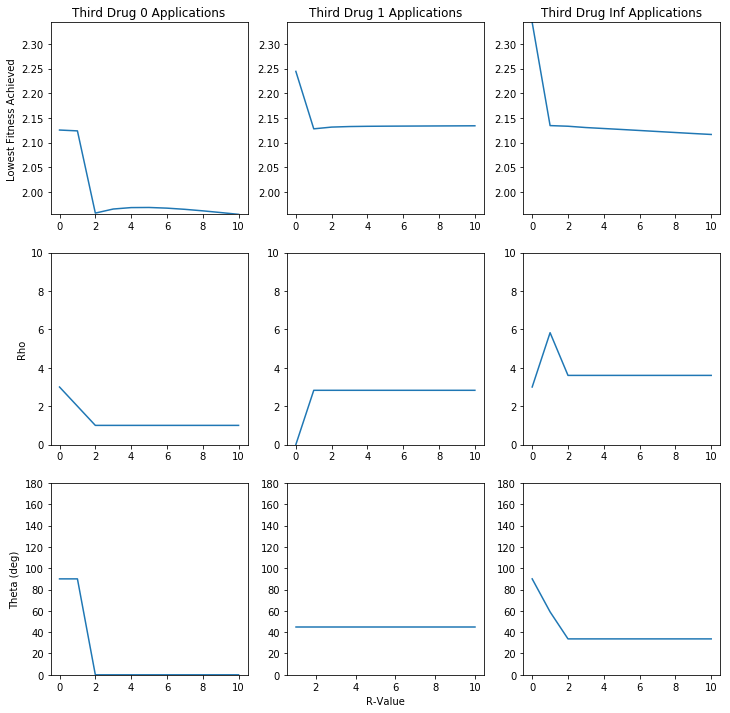

In [9]:
dataFrames = [df0, df1, dfInf]
fig = plt.figure(figsize=(12,12))
count = 331

yminF = min([min(df0['Lowest Fitness Achieved']), min(df1['Lowest Fitness Achieved']), min(dfInf['Lowest Fitness Achieved'])])
ymaxF = max([max(df0['Lowest Fitness Achieved']), max(df1['Lowest Fitness Achieved']), max(dfInf['Lowest Fitness Achieved'])])

for df in dataFrames:
    ax = fig.add_subplot(count)
    ax.plot(df['R-Value'], df['Lowest Fitness Achieved'])
    if count == 331:
        ax.set_title('Third Drug 0 Applications')
        ax.set_ylabel('Lowest Fitness Achieved')
    if count == 332:
        ax.set_title('Third Drug 1 Applications')
    if count == 333:
        ax.set_title('Third Drug Inf Applications')
    ax.set_ylim([yminF, ymaxF])
        
    
    spot2 = count + 3
    
    ax = fig.add_subplot(spot2)
    ax.plot(df['R-Value'], df['rho'])
    if spot2 == 334:
        ax.set_ylabel('Rho')
    ax.set_ylim([0, 10])
    
    spot3 = count + 6
    
    ax = fig.add_subplot(spot3)
    ax.plot(df['R-Value'], df['theta']/(np.pi/180))
    if spot3 == 337:
        ax.set_ylabel('Theta (deg)')
    if spot3 == 338:
        ax.set_xlabel('R-Value')
    ax.set_ylim([0, 180])
    
    count = count + 1

In [10]:
# Look at the very familiar SAM --> CPR --> AMP
def csvExplore(Drug1, Drug2, Drug3, f0=None, f1=None, finf=None, cols=None):
    nameD1 = Drug1.name
    nameD2 = Drug2.name
    nameD3 = Drug3.name
    
    if cols == None:
        col_names=['Final Drug', 'Steering Drug 1', 'Steering Drug 1 Amount', 'Steering Drug 2', 'Steering Drug 2 Amount',
                   'Drug1:Drug2', 'Drug1+Drug2', 'Fitness of infinite apps', 'Lowest Fitness Achieved',
                   'Maximum Simulated Drug Application', 'R-Value', 'epsilon', 'rho', 'theta']
    else:
        col_names = cols
    
    if f0 == None:
        filename = 'R0-10_AllDrugs_OnlyCountedWithin95perc_app10_eps_NoThirdInf.csv'
    else:
        filename = f0

    df0 = pd.read_csv(filename, names=col_names)
    df0 = df0[df0['Final Drug'] == nameD3]
    df0 = df0[(df0['Steering Drug 1'] == nameD1) & (df0['Steering Drug 2'] == nameD2)]

    if f1 == None:
        filename = 'R0-10_AllDrugs_OnlyCountedWithin95perc_app10_eps_ThirdOnceInf.csv'
    else:
        filename = f1
    df1 = pd.read_csv(filename, names=col_names)
    df1 = df1[df1['Final Drug'] == nameD3]
    df1 = df1[(df1['Steering Drug 1'] == nameD1) & (df1['Steering Drug 2'] == nameD2)]
    
    if finf == None:
        filename = 'R0-10_AllDrugs_OnlyCountedWithin95perc_app10_eps_ThirdInf.csv'
    else:
        filename = finf
    dfInf = pd.read_csv(filename, names=col_names)
    dfInf = dfInf[dfInf['Final Drug'] == nameD3]
    dfInf = dfInf[(dfInf['Steering Drug 1'] == nameD1) & (dfInf['Steering Drug 2'] == nameD2)]
    
    dataFrames = [df0, df1, dfInf]
    fig = plt.figure(figsize=(12,12))
    count = 331
    
    try:
        yminF = min([min(df0['Lowest Fitness Achieved']), min(df1['Lowest Fitness Achieved']), min(dfInf['Lowest Fitness Achieved'])])
    except:
        yminF = 0
        
    try:
        ymaxF = max([max(df0['Lowest Fitness Achieved']), max(df1['Lowest Fitness Achieved']), max(dfInf['Lowest Fitness Achieved'])])
    except:
        ymaxF = 3    
        
    
    for df in dataFrames:
        ax = fig.add_subplot(count)
        ax.plot(df['R-Value'], df['Lowest Fitness Achieved'])
        if count == 331:
            ax.set_title('Third Drug 0 Applications')
            ax.set_ylabel('Lowest Fitness Achieved')
        if count == 332:
            ax.set_title('Third Drug 1 Applications')
        if count == 333:
            ax.set_title('Third Drug Inf Applications')
        ax.set_ylim([yminF, ymaxF])

        spot2 = count + 3

        ax = fig.add_subplot(spot2)
        ax.plot(df['R-Value'], df['rho'])
        if spot2 == 334:
            ax.set_ylabel('Rho')
        ax.set_ylim([0, 10])

        spot3 = count + 6

        ax = fig.add_subplot(spot3)
        ax.plot(df['R-Value'], df['theta']/(np.pi/180))
        if spot3 == 337:
            ax.set_ylabel('Theta (deg)')
        if spot3 == 338:
            ax.set_xlabel('R-Value')
        ax.set_ylim([0, 180])

        count = count + 1
        plt.suptitle(nameD1+'$\Rightarrow$'+nameD2+'$\Rightarrow$'+nameD3, fontweight='bold', fontsize='x-large')
#         plt.tight_layout()
        plt.savefig('Plots/'+nameD1+'_'+nameD2+'_'+nameD3+'.png')
#         plt.close()
    return [df0, df1, dfInf, yminF, ymaxF]

In [11]:
def matrixPlotter(DRUG1, DRUG2, DRUG, yminF=0, ymaxF=3.4, mod=None, Ap=10):
    
    cmap = plt.cm.inferno
    norm = mpl.colors.BoundaryNorm(np.arange(yminF,ymaxF,0.01), cmap.N)
    
    avgMat = np.zeros([Ap+1, Ap+1])
    if mod == None:
        for NA in range(0,Ap+1):
            for NB in range(0,Ap+1):
                SN = np.array(S0) * DRUG1.tMat**NA * DRUG2.tMat**NB * DRUG.tMat**100
                AvgFit = np.dot(np.array(SN[0,:]), AMP.Fit)
                avgMat[NA, NB] = AvgFit
    if mod == 1:
        for NA in range(0,Ap+1):
            for NB in range(0,Ap+1):
                SN = np.array(S0) * DRUG1.tMat**NA * DRUG2.tMat**NB * DRUG.tMat**1
                AvgFit = np.dot(np.array(SN[0,:]), AMP.Fit)
                avgMat[NA, NB] = AvgFit
    if mod == 0:
        for NA in range(0,Ap+1):
            for NB in range(0,Ap+1):
                SN = np.array(S0) * DRUG1.tMat**NA * DRUG2.tMat**NB
                AvgFit = np.dot(np.array(SN[0,:]), AMP.Fit)
                avgMat[NA, NB] = AvgFit

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    Z = ax.matshow(avgMat, cmap=cmap, norm=norm)
    ax.set_xlabel(DRUG1.name + ' Applied Second N Times')
    ax.set_ylabel(DRUG2.name + ' Applied First N Times')
    ax.set_title('Average Fitness <f> for ' + DRUG.name)
    plt.colorbar(Z)
    plt.tight_layout()


2.033
10


,Final Drug,Steering Drug 1,Steering Drug 1 Amount,Steering Drug 2,Steering Drug 2 Amount,Drug1:Drug2,Drug1+Drug2,Fitness of infinite apps,Lowest Fitness Achieved,Maximum Simulated Drug Application,R-Value,epsilon,rho,theta
136,Ampicillin,Ampicillin+Sulbactam,0,Cefprozil,3,0.0,3,[2.2363],2.343789,10,0,0.05,3.000000,1.570796
3076,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,5,0.6,8,[2.033],2.134438,10,1,0.05,5.830952,1.030377
6016,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.133139,10,2,0.05,3.605551,0.588003
8956,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.130481,10,3,0.05,3.605551,0.588003
11896,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.128505,10,4,0.05,3.605551,0.588003
14836,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.126542,10,5,0.05,3.605551,0.588003
17776,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.124509,10,6,0.05,3.605551,0.588003
20716,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.122436,10,7,0.05,3.605551,0.588003
23656,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.120370,10,8,0.05,3.605551,0.588003
26596,Ampicillin,Ampicillin+Sulbactam,3,Cefprozil,2,1.5,5,[2.033],2.118354,10,9,0.05,3.605551,0.588003


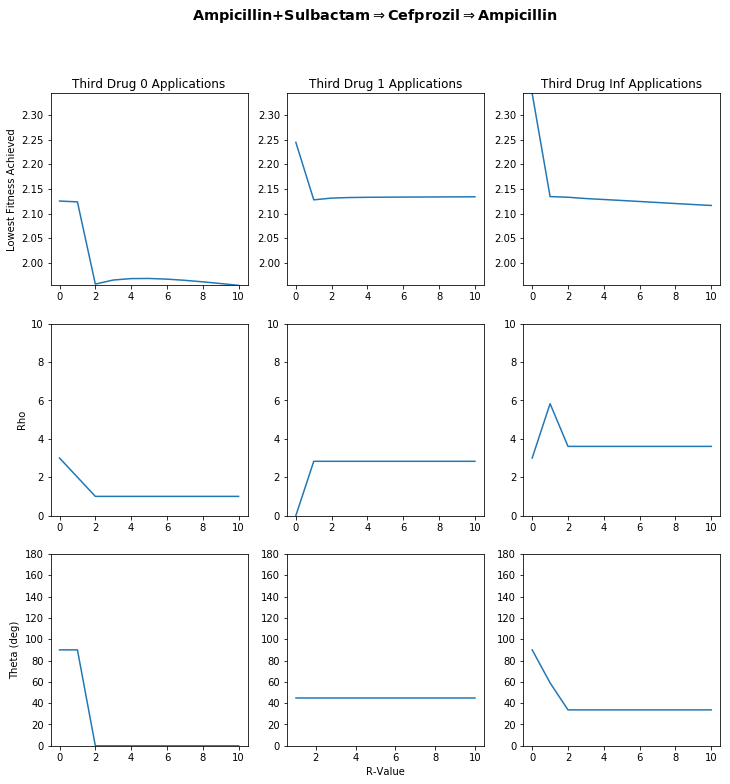

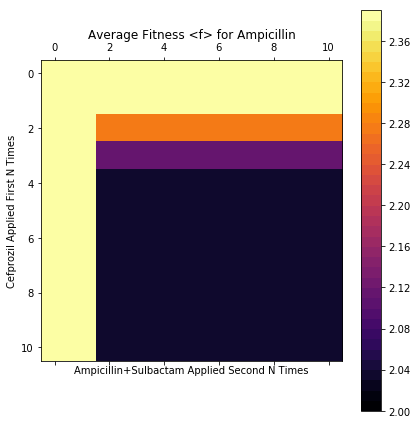

In [13]:
df = csvExplore(SAM, CPR, AMP)
print(AMP.LPFf)
print(AMP.R)
matrixPlotter(SAM, CPR, AMP, 2, 2.4)
df[2]

2.042


,Final Drug,Steering Drug 1,Steering Drug 1 Amount,Steering Drug 2,Steering Drug 2 Amount,Drug1:Drug2,Drug1+Drug2,Fitness of infinite apps,Lowest Fitness Achieved,Maximum Simulated Drug Application,R-Value,epsilon,rho,theta
332,Amoxicillin,Ampicillin+Sulbactam,1,Cefprozil,0,inf,1,[2.36034198],2.332867,10,0,0.05,1.0,0.000000
3272,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,0,NaN,0,[2.12052355],2.184875,10,1,0.05,0.0,NaN
6212,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,0,NaN,0,[2.10454712],2.182832,10,2,0.05,0.0,NaN
9152,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,0,NaN,0,[2.09029475],2.180625,10,3,0.05,0.0,NaN
12092,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,0,NaN,0,[2.07798425],2.178853,10,4,0.05,0.0,NaN
15032,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,1,0.000000,1,[2.06807126],2.150557,10,5,0.05,1.0,1.570796
17972,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,1,0.000000,1,[2.06052711],2.147949,10,6,0.05,1.0,1.570796
20912,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,1,0.000000,1,[2.05499228],2.145863,10,7,0.05,1.0,1.570796
23852,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,1,0.000000,1,[2.05102745],2.144176,10,8,0.05,1.0,1.570796
26792,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,1,0.000000,1,[2.04823253],2.142794,10,9,0.05,1.0,1.570796


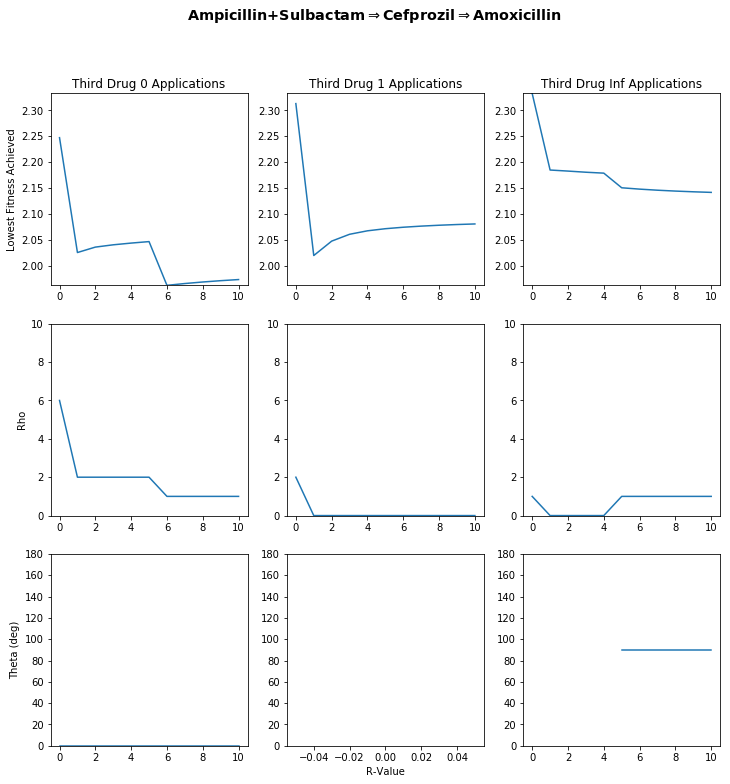

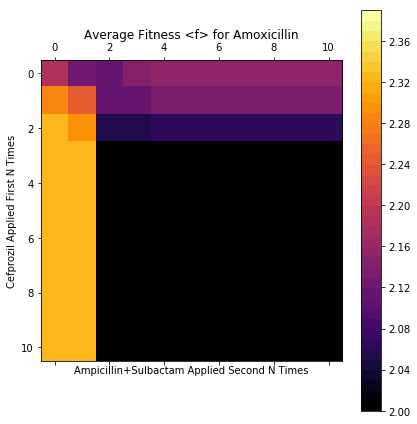

In [14]:
df = csvExplore(SAM, CPR, AM)
print(AM.LPFf)
matrixPlotter(SAM, CPR, AM, 2, 2.4)
df[2]

2.396


,Final Drug,Steering Drug 1,Steering Drug 1 Amount,Steering Drug 2,Steering Drug 2 Amount,Drug1:Drug2,Drug1+Drug2,Fitness of infinite apps,Lowest Fitness Achieved,Maximum Simulated Drug Application,R-Value,epsilon,rho,theta
454,Cefaclor,Cefuroxime,0,Amoxicillin+Clav,0,NaN,0,[2.44966407],2.542375,10,0,0.05,0.0,NaN
3394,Cefaclor,Cefuroxime,0,Amoxicillin+Clav,0,NaN,0,[2.47594698],2.558447,10,1,0.05,0.0,NaN
6334,Cefaclor,Cefuroxime,0,Amoxicillin+Clav,0,NaN,0,[2.48489445],2.569836,10,2,0.05,0.0,NaN
9274,Cefaclor,Cefuroxime,0,Amoxicillin+Clav,0,NaN,0,[2.49727625],2.577031,10,3,0.05,0.0,NaN
12214,Cefaclor,Cefuroxime,0,Amoxicillin+Clav,0,NaN,0,[2.50933076],2.581286,10,4,0.05,0.0,NaN
15154,Cefaclor,Cefuroxime,0,Amoxicillin+Clav,0,NaN,0,[2.51957364],2.583810,10,5,0.05,0.0,NaN
18094,Cefaclor,Cefuroxime,0,Amoxicillin+Clav,0,NaN,0,[2.52809414],2.585381,10,6,0.05,0.0,NaN
21034,Cefaclor,Cefuroxime,0,Amoxicillin+Clav,0,NaN,0,[2.53527175],2.586429,10,7,0.05,0.0,NaN
23974,Cefaclor,Cefuroxime,0,Amoxicillin+Clav,0,NaN,0,[2.5414191],2.587175,10,8,0.05,0.0,NaN
26914,Cefaclor,Cefuroxime,0,Amoxicillin+Clav,0,NaN,0,[2.54674663],2.587735,10,9,0.05,0.0,NaN


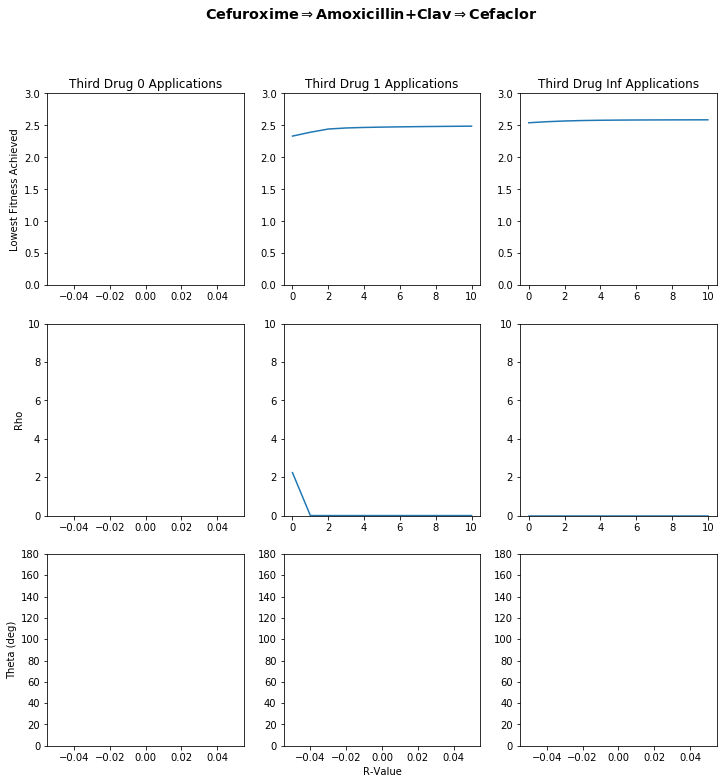

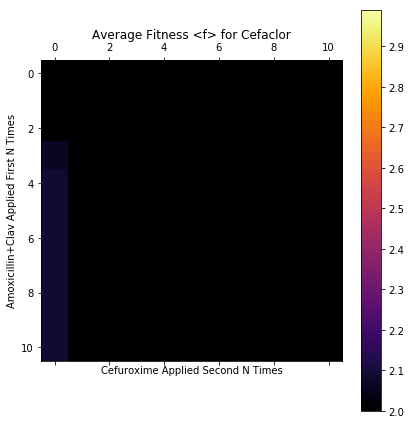

In [15]:
df = csvExplore(CXM, AMC, CEC)
print(CEC.LPFf)
matrixPlotter(CXM, AMC, CEC, 2.0, 3)
df[2]

1.969


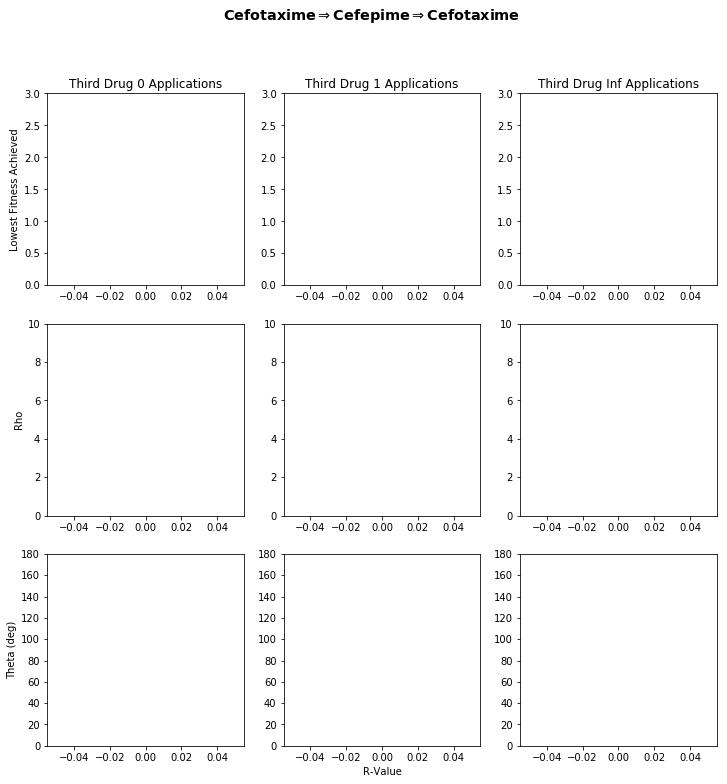

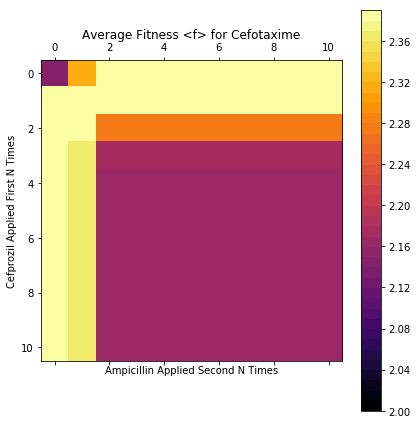

In [16]:
df = csvExplore(CTX, FEP, CTX)
print(CTX.LPFf)
df[2]
matrixPlotter(AMP, CPR, CTX, 2.0, 2.4)

1.171


,Final Drug,Steering Drug 1,Steering Drug 1 Amount,Steering Drug 2,Steering Drug 2 Amount,Drug1:Drug2,Drug1+Drug2,Fitness of infinite apps,Lowest Fitness Achieved,Maximum Simulated Drug Application,R-Value,epsilon,rho,theta
911,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.539625],2.477306,10,0,0.05,0.0,NaN
3851,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.64743193],2.565248,10,1,0.05,0.0,NaN
6791,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.68582035],2.587509,10,2,0.05,0.0,NaN
9731,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.68789159],2.591916,10,3,0.05,0.0,NaN
12671,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.68799481],2.592893,10,4,0.05,0.0,NaN
15611,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.68799976],2.593119,10,5,0.05,0.0,NaN
18551,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.68799999],2.593171,10,6,0.05,0.0,NaN
21491,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.688],2.593184,10,7,0.05,0.0,NaN
24431,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.688],2.593187,10,8,0.05,0.0,NaN
27371,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.688],2.593187,10,9,0.05,0.0,NaN


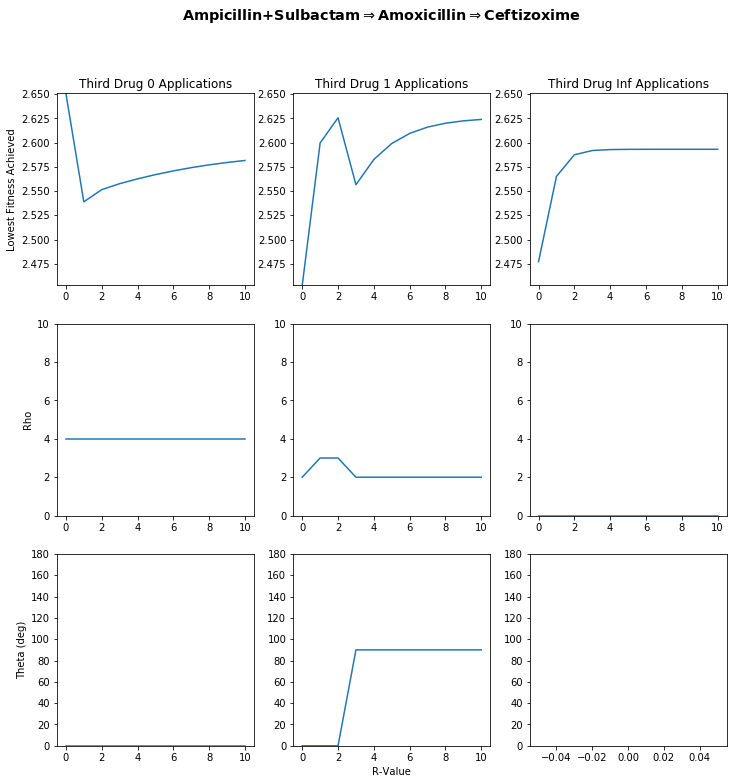

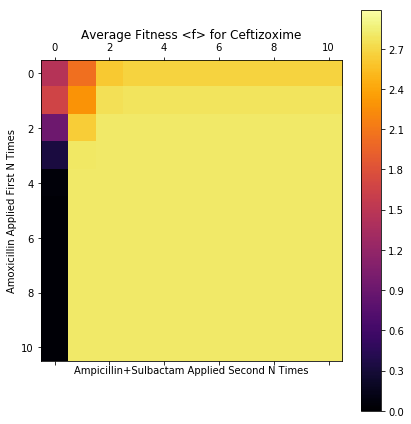

In [17]:
df = csvExplore(SAM, AM, ZOX)
print(ZOX.LPFf)
matrixPlotter(SAM, AM, ZOX, 0, 3, mod=1)
df[2]

1.171


,Final Drug,Steering Drug 1,Steering Drug 1 Amount,Steering Drug 2,Steering Drug 2 Amount,Drug1:Drug2,Drug1+Drug2,Fitness of infinite apps,Lowest Fitness Achieved,Maximum Simulated Drug Application,R-Value,epsilon,rho,theta
911,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.539625],2.477306,10,0,0.05,0.0,NaN
3851,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.64743193],2.565248,10,1,0.05,0.0,NaN
6791,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.68582035],2.587509,10,2,0.05,0.0,NaN
9731,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.68789159],2.591916,10,3,0.05,0.0,NaN
12671,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.68799481],2.592893,10,4,0.05,0.0,NaN
15611,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.68799976],2.593119,10,5,0.05,0.0,NaN
18551,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.68799999],2.593171,10,6,0.05,0.0,NaN
21491,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.688],2.593184,10,7,0.05,0.0,NaN
24431,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.688],2.593187,10,8,0.05,0.0,NaN
27371,Ceftizoxime,Ampicillin+Sulbactam,0,Amoxicillin,0,NaN,0,[2.688],2.593187,10,9,0.05,0.0,NaN


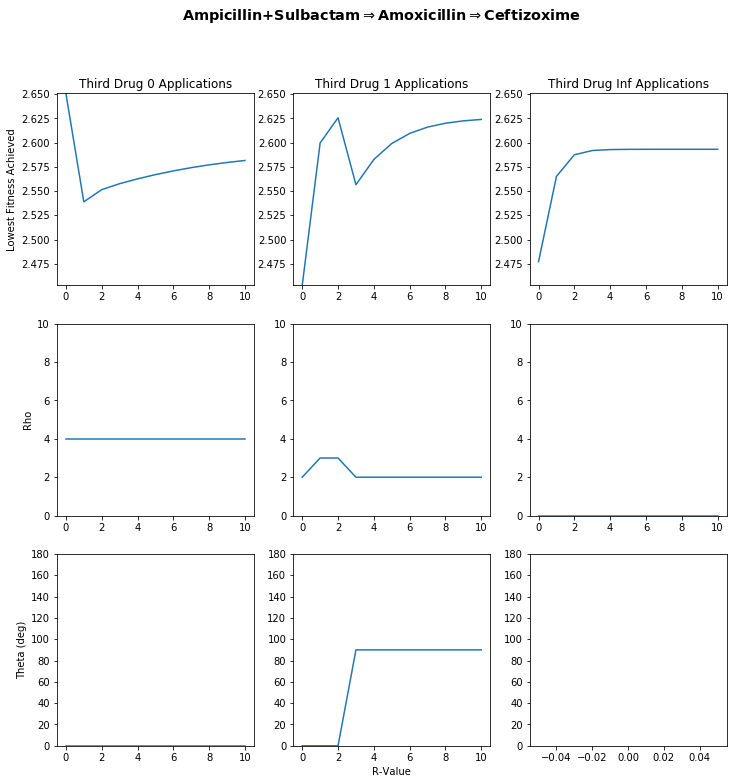

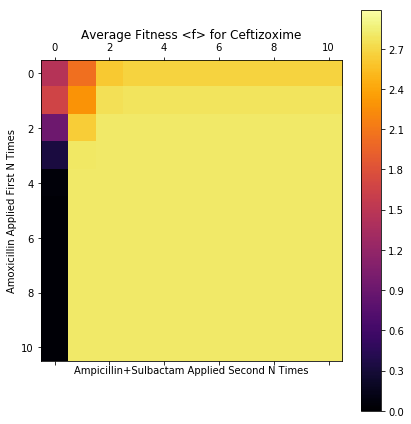

In [18]:
df = csvExplore(SAM, AM, ZOX)
print(ZOX.LPFf)
matrixPlotter(SAM, AM, ZOX, 0, 3, mod=1)
df[2]

## Next Steps

Wrt R, how does R-Value affect different aspect. Look at intmdte R-Values and experimentally what is actually happening...

What does R mean and does it matter...

Story out of a piecewise R picture